In [2]:
import mujoco
from pathlib import Path
import gym_lite6
import gymnasium as gym
import gym_lite6.env, gym_lite6.scripted_policy, gym_lite6.pickup_task
import mediapy as media

In [56]:
model_path = Path(gym_lite6.__path__[0] + "/../models/lite6_gripper_wide.xml").resolve()
model_spec = mujoco.MjSpec.from_file(str(model_path))

obj_path = gym_lite6.__path__[0] + "/../models/cube_pickup_large.xml"
obj_spec = mujoco.MjSpec.from_file(obj_path)

scene_path = gym_lite6.__path__[0] + "/../models/scene.xml"
scene_spec = mujoco.MjSpec.from_file(scene_path)

In [44]:
def print_bodies(parent, level=0):
  body = parent.first_body()
  while body:
    print(''.join(['-' for i in range(level)]) + body.name)
    print_bodies(body, level + 1)
    body = parent.next_body(body)
print_bodies(scene_spec.worldbody)
for site in scene_spec.sites:
  print(site.name)
for actuator in scene_spec.actuators:
  print(actuator.name)

In [122]:
for i in range(env.unwrapped.model.njnt):
    print(f"{i} {env.unwrapped.model.jnt(i)}")

0 <_MjModelJointViews
  M0: array([1.53664000e-02, 1.53664000e-02, 1.53664000e-02, 2.00787627e-06,
       2.00787627e-06, 2.00787627e-06])
  Madr: array([ 0,  1,  3,  6, 10, 15], dtype=int32)
  armature: array([0., 0., 0., 0., 0., 0.])
  axis: array([0., 0., 1.])
  bodyid: array([1, 1, 1, 1, 1, 1], dtype=int32)
  damping: array([0., 0., 0., 0., 0., 0.])
  dofadr: array([0], dtype=int32)
  frictionloss: array([0., 0., 0., 0., 0., 0.])
  group: array([0], dtype=int32)
  id: 0
  invweight0: array([6.50770512e+01, 6.50770512e+01, 6.50770512e+01, 4.98038657e+05,
       4.98038657e+05, 4.98038657e+05])
  jntid: array([0, 0, 0, 0, 0, 0], dtype=int32)
  limited: array([0], dtype=uint8)
  margin: array([0.])
  name: 'red_box_joint-1'
  parentid: array([-1,  0,  1,  2,  3,  4], dtype=int32)
  pos: array([0., 0., 0.])
  qpos0: array([0.2, 0.2, 0. , 1. , 0. , 0. , 0. ])
  qpos_spring: array([0.2, 0.2, 0. , 1. , 0. , 0. , 0. ])
  qposadr: array([0], dtype=int32)
  range: array([0., 0.])
  simplenum

In [57]:
frame = scene_spec.worldbody.add_frame()
frame.attach(model_spec, "", "-1")
frame.attach(obj_spec, "", "-1")

In [96]:
[(i, s.name) for i, s in enumerate(scene_spec.bodies)]

[(0, 'world'),
 (1, 'link_base-1'),
 (2, 'target-1'),
 (3, 'box-1'),
 (4, 'link1-1'),
 (5, 'link2-1'),
 (6, 'link3-1'),
 (7, 'link4-1'),
 (8, 'link5-1'),
 (9, 'link6-1'),
 (10, 'gripper_body-1'),
 (11, 'gripper_left_finger-1'),
 (12, 'gripper_right_finger-1')]

In [58]:
model = scene_spec.compile()
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

""

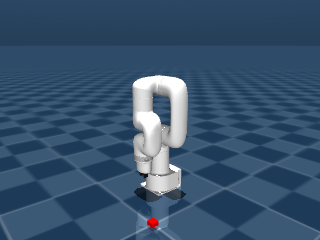

In [59]:
camera = mujoco.MjvCamera()
mujoco.mjv_defaultFreeCamera(model, camera)
camera.distance = 1.2
camera.elevation = -15
camera.azimuth = -130
camera.lookat = (0, 0, 0.3)

mujoco.mj_forward(model, data)

renderer.update_scene(data, camera)
media.show_image(renderer.render())

In [30]:
# dir(scene_spec.compiler)
for attr in dir(scene_spec.compiler):
    if not attr.startswith("__"):
        print(attr, getattr(scene_spec.compiler, attr))

LRopt <MjLROpt
  accel: 20.0
  interval: 2.0
  inttotal: 10.0
  maxforce: 0.0
  mode: 1
  timeconst: 1.0
  timestep: 0.01
  tolrange: 0.05
  useexisting: 1
  uselimit: 0
>
_pybind11_conduit_v1_ <bound method PyCapsule._pybind11_conduit_v1_ of <mujoco._specs.MjsCompiler object at 0x16da53f70>>
alignfree 0
autolimits 1
balanceinertia 0
boundinertia 0.0
boundmass 0.0
degree 1
discardvisual 0
eulerseq <mujoco._specs.MjCharVec object at 0x30ca318f0>
fitaabb 0
fusestatic 0
inertiafromgeom 2
inertiagrouprange [0 5]
settotalmass -1.0
usethread 1


In [32]:
# scene_spec.option
for attr in dir(scene_spec.option):
    if not attr.startswith("__"):
        print(attr, getattr(scene_spec.option, attr))

_pybind11_conduit_v1_ <bound method PyCapsule._pybind11_conduit_v1_ of <mujoco._specs.MjOption object at 0x17f2de930>>
apirate 100.0
ccd_iterations 50
ccd_tolerance 1e-06
cone 0
density 0.0
disableactuator 0
disableflags 0
enableflags 0
gravity [ 0.    0.   -9.81]
impratio 1.0
integrator 0
iterations 100
jacobian 2
ls_iterations 50
ls_tolerance 0.01
magnetic [ 0.  -0.5  0. ]
noslip_iterations 0
noslip_tolerance 1e-06
o_friction [1.e+00 1.e+00 5.e-03 1.e-04 1.e-04]
o_margin 0.0
o_solimp [9.0e-01 9.5e-01 1.0e-03 5.0e-01 2.0e+00]
o_solref [0.02 1.  ]
sdf_initpoints 40
sdf_iterations 10
solver 2
timestep 0.002
tolerance 1e-08
viscosity 0.0
wind [0. 0. 0.]


In [62]:
model.cam()

KeyError: "Invalid name ''. Valid names: ['gripper_cam-1', 'side_cam-1']"

In [34]:
data.contact.geom

array([[ 0, 23],
       [ 0, 23],
       [ 0, 23],
       [ 0, 23],
       [18, 21]], dtype=int32)

""

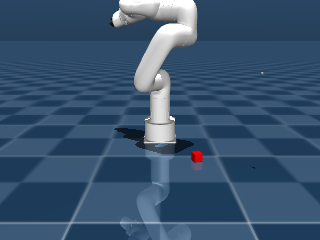

In [124]:
from importlib import reload

reload(gym_lite6.env)
reload(gym_lite6.utils)
reload(gym_lite6.scripted_policy)
reload(gym_lite6.pickup_task)

# task = gym_lite6.pickup_task.GraspTask('gripper_left_finger', 'gripper_right_finger', 'box', 'floor')
task = gym_lite6.pickup_task.GraspAndLiftTask('gripper_left_finger-1', 'gripper_right_finger-1', 'box-1', 'floor')

env = gym.make(
    "UfactoryCubePickup-v0",
    task=task,
    obs_type="pixels_state",
    max_episode_steps=300,
    visualization_width=320,
    visualization_height=240
)

observation, info = env.reset()
media.show_image(env.unwrapped.render(camera="side_cam-1"))
